#### About the Dataset:

This dataset is a well-known heart disease dataset, often used in machine learning and statistical analysis for predicting the presence of heart disease in patients based on various clinical attributes. The data was originally collected by the Cleveland Clinic Foundation and consists of 303 observations, each representing an individual patient's health metrics.

____________________________________________________________________________________

Key Features:
____________________________________________________________________________________

Demographics: Includes age and sex, providing basic information about each patient.

Clinical Measurements: Features like resting blood pressure (trestbps), cholesterol level (chol), and maximum heart rate achieved (thalach) are standard clinical measures used to assess cardiovascular health.

Symptoms: The dataset includes indicators of chest pain (cp), fasting blood sugar (fbs), and exercise-induced angina (exang), which are critical in diagnosing heart conditions.

Electrocardiographic Data: The restecg feature represents the results of resting electrocardiographic tests, which detect abnormalities in heart function.

Exercise Stress Test Results: oldpeak and slope measure the response of the heart to physical stress, important for assessing the severity of heart disease.

Angiographic Data: The ca variable represents the number of major vessels colored by fluoroscopy, which helps visualize blood flow and blockages.

____________________________________________________________________________________

Target Variable:
____________________________________________________________________________________

target: This is the outcome variable indicating the presence (1) or absence (0) of heart disease, making this dataset suitable for binary classification tasks.

____________________________________________________________________________________

Applications:
____________________________________________________________________________________

Predictive Modeling: The dataset is widely used to develop and evaluate predictive models, such as logistic regression, decision trees, and neural networks, aimed at diagnosing heart disease.

Exploratory Data Analysis (EDA): Researchers and practitioners use this data to explore relationships between various health metrics and heart disease, often leading to insights that can improve clinical decision-making.

Feature Engineering: It serves as a classic example for feature selection, transformation, and scaling in machine learning pipelines.

____________________________________________________________________________________

Details About the Columns:
____________________________________________________________________________________

The dataset contains 303 entries with 14 columns, all of which are fully populated (no missing values). Here’s a brief overview of the columns:

age: Age of the patient (integer).

sex: Gender of the patient (1 = male, 0 = female).

cp: Chest pain type (categorical, with values 0–3).

trestbps: Resting blood pressure (in mm Hg).

chol: Serum cholesterol in mg/dl.

fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

restecg: Resting electrocardiographic results (categorical, with values 0–2).

thalach: Maximum heart rate achieved.

exang: Exercise induced angina (1 = yes, 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment (categorical, with values 0–2).

ca: Number of major vessels (0-3) colored by fluoroscopy.

thal: Thalassemia (categorical, with values 1 = normal, 2 = fixed defect, 3 = reversible defect).

target: Target variable (1 = presence of heart disease, 0 = absence of heart disease).

### 1. Importing Libraries: 

In [1]:
# Importing necessary libraries

# Regular EDA and plotting libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
%matplotlib inline 

# Models for scikit-learn
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")  # To ignore warning messages during execution

### 2. Loading the Data:

In [2]:
# Loading dataset

df = pd.read_csv("/Users/saumyaranjanpanigrahi/Documents/SAM_JobStudy/Top 10 Projects/Machine_Learning/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

### 3. EDA (exploratory data analysis)
1- what question(s) are we trying to solve

2- what kind of data do we have and do we treat different types?

3- what's missing from the data and how we deal with it

4- where are the outliers and why should we care about them

5- how can we add, change or remove features to get more out of our data

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Looking for missing values

df.isnull().sum()

# Note: it's also same as -> df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Finding the Pattern in our Dataset / Visualization

Finding 1: Heart disease (with or without) count of people

Finding 2: Heart disease according to SEX

Finding 3: Heart disease according to age and max heart rate

Finding 4: Heart disease according to chest pain type

Finding 5: Building correlation matrix

##### Finding 1: Counts of people with or without heart disease:

In [9]:
# Let's check the counts of people with or without heart disease.

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

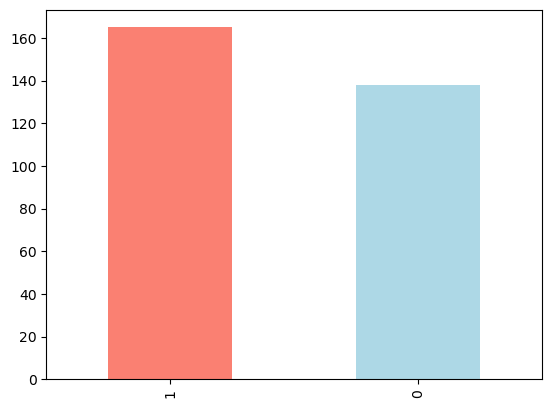

In [10]:
# Let's visualize the count in bar plot

df['target'].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

##### Finding 2: Heart disease frequency according to SEX

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Now comparing the target column with the sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


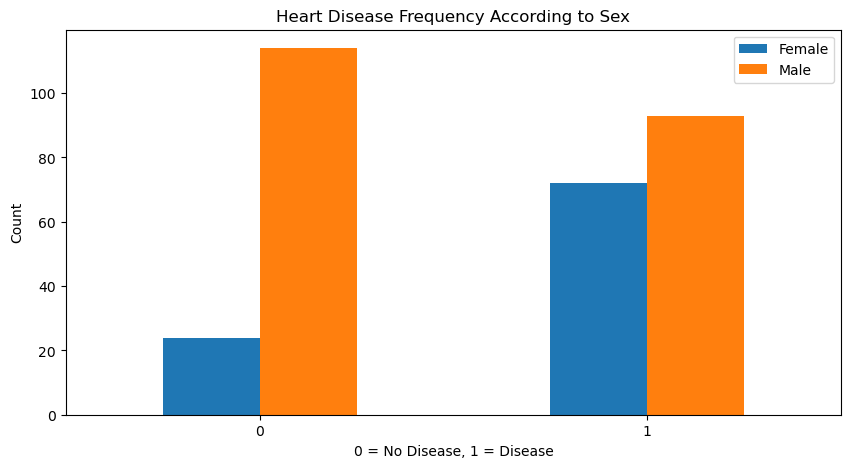

In [13]:
# Plotting this in to a bar plot
# Target vs Male or Female Counts

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,5))
plt.title("Heart Disease Frequency According to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

##### Why a Bar Plot is Used:

Comparison Between Groups: A bar plot is ideal for comparing the frequency or count of categorical variables. In this case, the goal is to compare the number of people with and without heart disease (df.target) across genders (df.sex).

Clear Representation: The bar plot clearly shows the differences in the counts of heart disease cases between males and females. Each bar represents a different group (e.g., males with disease, females without disease), making it easy to see patterns or trends.

Grouped Data: When you have data grouped into categories, like "Male" and "Female" and you want to compare these groups across another category ("No Disease" vs. "Disease"), a bar plot is a straightforward way to visualize this.

##### Finding 3: Heart disease according to age and max heart rate

In [14]:
df.thalach.value_counts()

# Note: here it means the count of people having the same heart rate i.e 11 people have 162 heart rate

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

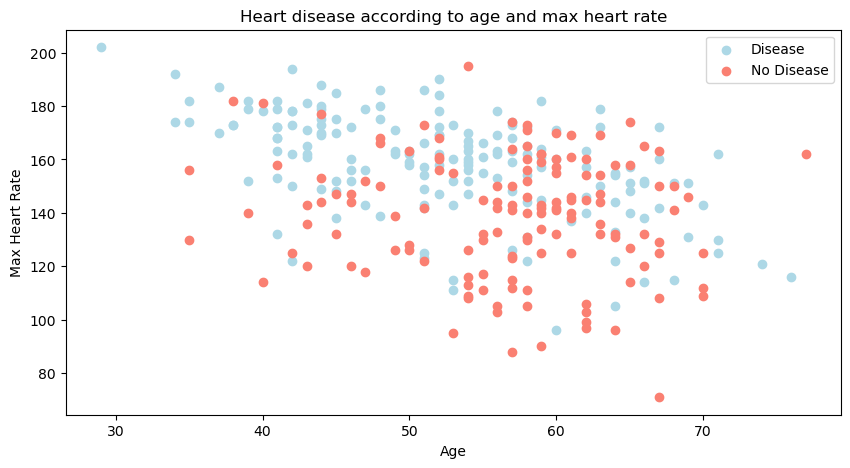

In [15]:
# Age vs Max Heart Rate

plt.figure(figsize=(10,5))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color = "lightblue")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color = "salmon")
plt.title("Heart disease according to age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

##### Why a Scatter Plot is Used:

Relationship Between Two Continuous Variables: A scatter plot is ideal for showing the relationship between two continuous variables. In this case, age and thalach (maximum heart rate) are continuous variables. The scatter plot allows you to visualize how these variables interact.

Pattern Detection: By plotting age against thalach, you can observe patterns, such as whether younger or older individuals with heart disease tend to have higher or lower maximum heart rates.

Group Differentiation: The use of different colors for individuals with and without heart disease helps to differentiate between the groups visually. This makes it easy to see if there's a noticeable difference in max heart rate or age between those with and without heart disease.

Trend Identification: Scatter plots can help identify trends or clusters within the data, such as whether there is a general trend that older people have lower max heart rates or whether people with heart disease tend to have different max heart rate patterns compared to those without.

##### Finding 4: Heart disease according to chest pain type

In [16]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


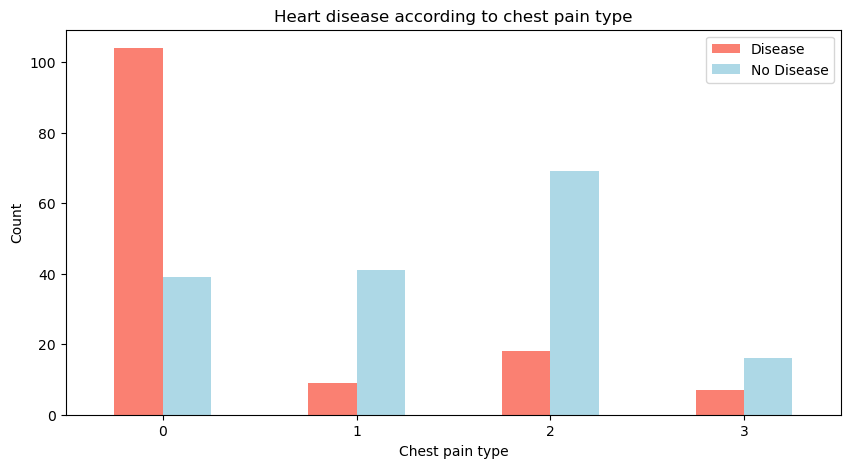

In [18]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize =(10,5), color = ["salmon", "lightblue"])
plt.title("Heart disease according to chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Count")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0);

##### Finding 5: Building correlation matrix

In [19]:
# Building correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


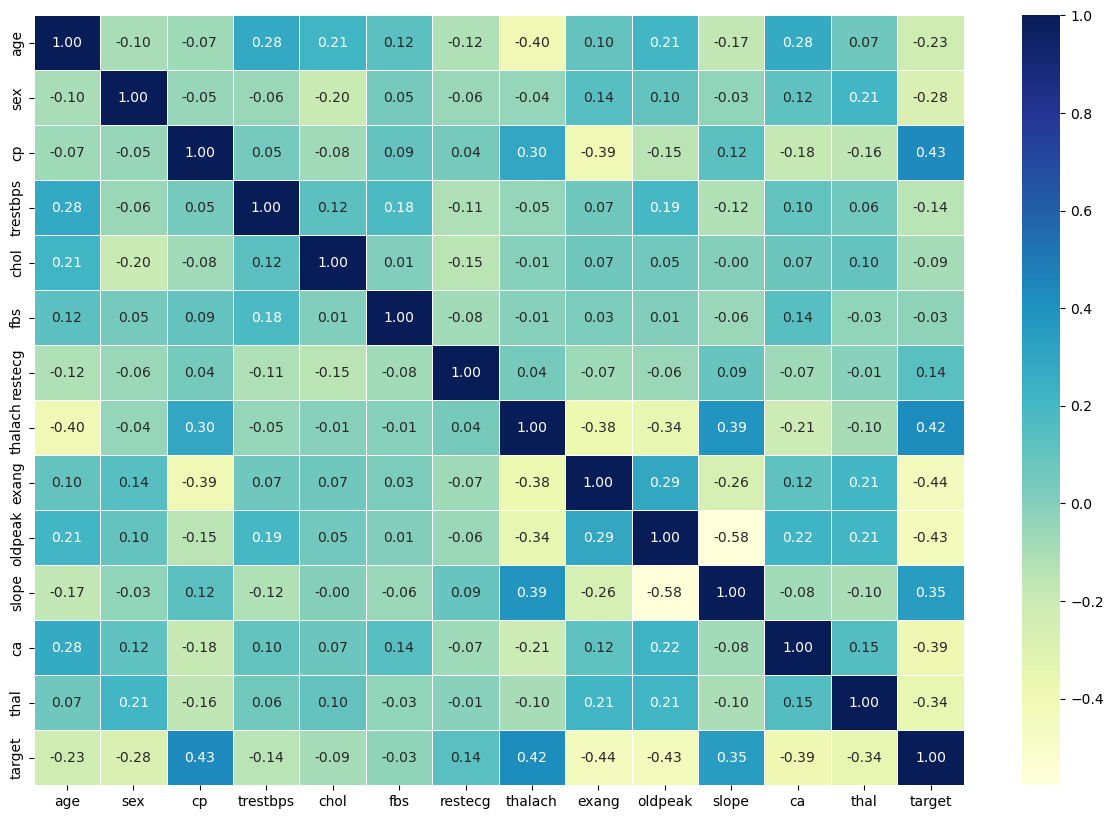

In [20]:
# Correlation matrix in heat map

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap='YlGnBu')

### 5. Modelling

In [22]:
# Split data into X and Y

X = df.drop("target", axis=1)
Y = df["target"]

In [23]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

##### Choosing the right ML model for our problem

It's a classification problem

In [28]:
# Dictionary of models
models = {
    "logistic regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier()
}

# Function to fit and score the models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    # Set random seed
    np.random.seed(42)
    
    # Initialize a dictionary to hold model scores
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    
    return model_scores

# Assuming X_train, X_test, Y_train, Y_test are defined and available
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)
model_scores

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

##### Model Comparisons

In [29]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare

,logistic regression,KNN,RandomForest
accuracy,0.885246,0.688525,0.836066


<AxesSubplot:>

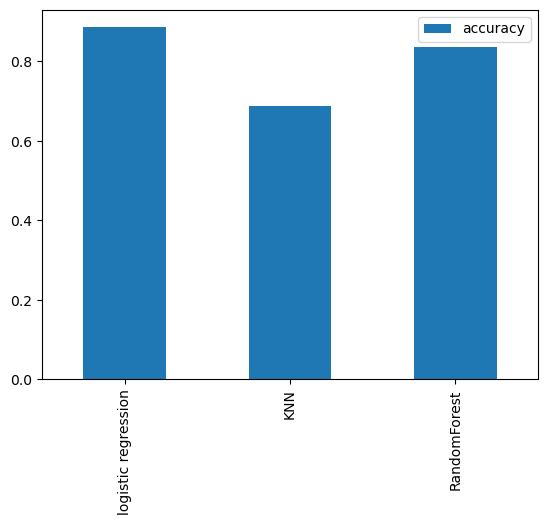

In [30]:
model_compare.T.plot.bar()

### 5. Tuning and Improving the Model

1. Hyperparameter Tuning KNN
2. Hyperparameter Tuning Logistic Regression
3. Hyperparameter Tuning RadomForest Classifier

##### 1. Hyperparameter Tuning KNN

In [31]:
# Hyperparameter Tuning KNN
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)

    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data:75.41


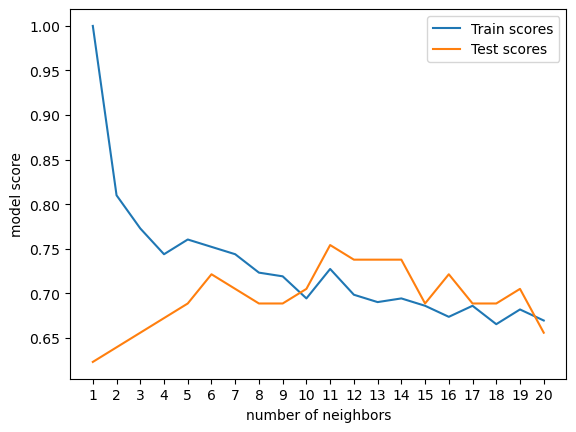

In [34]:
plt.plot(neighbors, train_scores,label="Train scores")
plt.plot(neighbors, test_scores,label="Test scores")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.xticks(np.arange(1,21))
plt.legend()
print(f"maximum KNN score on the test data:{max(test_scores)*100:.2f}")

##### 2. Hyperparameter Tuning Logistic Regression

In [36]:
# Hyperparameter Tuning
# Logistic Regression

log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}



np.random.seed(42)

# setup random hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

##### 3. Hyperparameter Tuning RandomForest Classification

In [39]:
# Hyperparameter Tuning
# RandomForest Classifier

rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,1)}

np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

# fit random hyperparameter search model for RandomForestClassifier

rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

#### GridSearchCV

hyperparameter tuning using GridSearchCV on our LogisticRegression model

In [44]:
model_scores

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [45]:
#create hyperparameter grid for the logistic regression
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

### 5. Tuning and Improving the Model

1. ROC curve & Area Under the Curve (AUC)
2. Confusion Matrix
3. Classification Report
(Precision, Recall & F1 Score)
4. Cross Validation Metrics
5. Feature Importance

##### 1. ROC curve & Area Under the Curve (AUC)

In [47]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [48]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

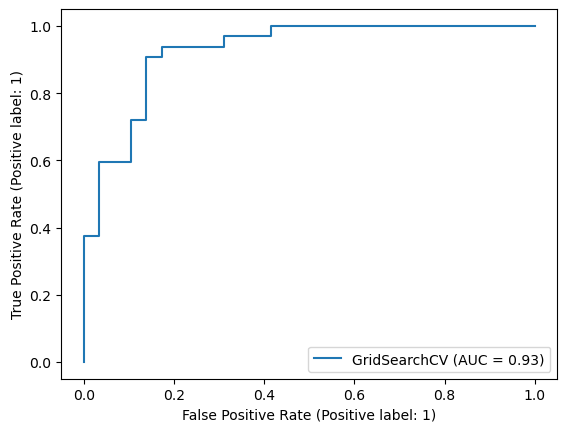

In [49]:
# plotting ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,Y_test)

##### 2. Confusion Matrix

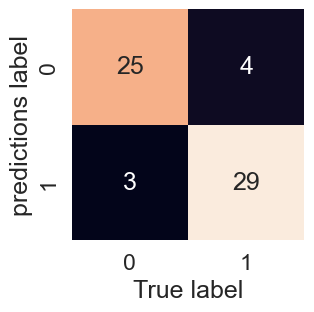

In [50]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(Y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predictions label")
plot_confusion_matrix(Y_test,y_preds)

##### 3. Classification Matrix

In [51]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



##### 4. Cross validation

The code you've shared is an example of performing cross-validation to evaluate a machine learning model (in this case, a logistic regression model) on various metrics. Specifically, this code computes the cross-validated accuracy, precision, recall, and F1 score for the model.

In [52]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [54]:
# CV accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [55]:
# CV precision
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [56]:
# CV recall
cv_rec=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.9272727272727274

In [57]:
# CV f1-score
cv_f=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f=np.mean(cv_f)
cv_f

0.8705403543192143

##### Visualize Cross Validation

<AxesSubplot:title={'center':'Cross Validation classification metrics'}>

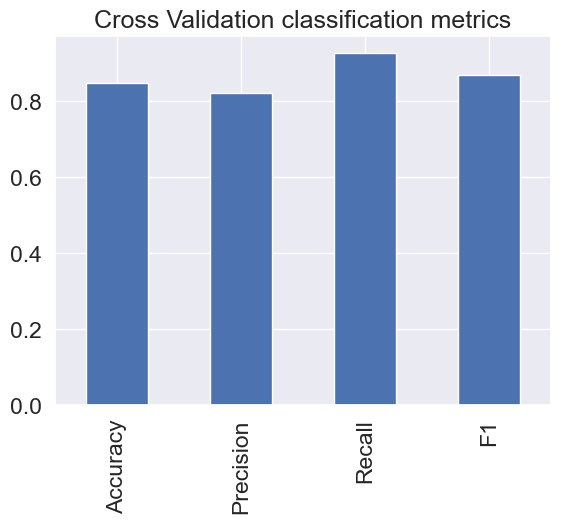

In [58]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "F1":cv_f},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross Validation classification metrics",legend=False)

##### 5. Feature Importance

which features cotributed the most to the outcomes of the model

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
# fit an instance of logistic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train, Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [62]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044681,  0.66067028, -0.01156993, -0.00166374,
         0.04386098,  0.31275871,  0.02459362, -0.60413098, -0.56862784,
         0.45051633, -0.63609911, -0.67663374]])

In [63]:
# match coefs of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672836648050503,
 'sex': -0.8604468104930325,
 'cp': 0.6606702797887507,
 'trestbps': -0.01156993266606034,
 'chol': -0.0016637447948541165,
 'fbs': 0.043860983413115645,
 'restecg': 0.31275871271392713,
 'thalach': 0.024593615341531826,
 'exang': -0.6041309838702352,
 'oldpeak': -0.5686278420079321,
 'slope': 0.45051633355228077,
 'ca': -0.6360991091618156,
 'thal': -0.6766337375624075}

##### Visualize Feature Importance

<AxesSubplot:title={'center':'Feature importance'}>

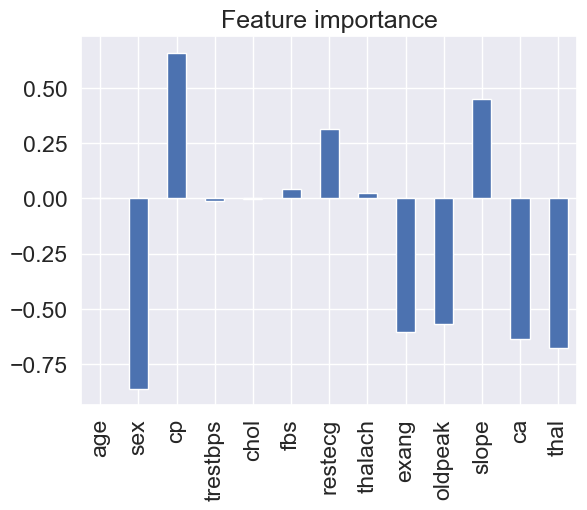

In [64]:
# visualize features importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False)

#                                                    THE END